In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
data = loadmat('ex5data1.mat')

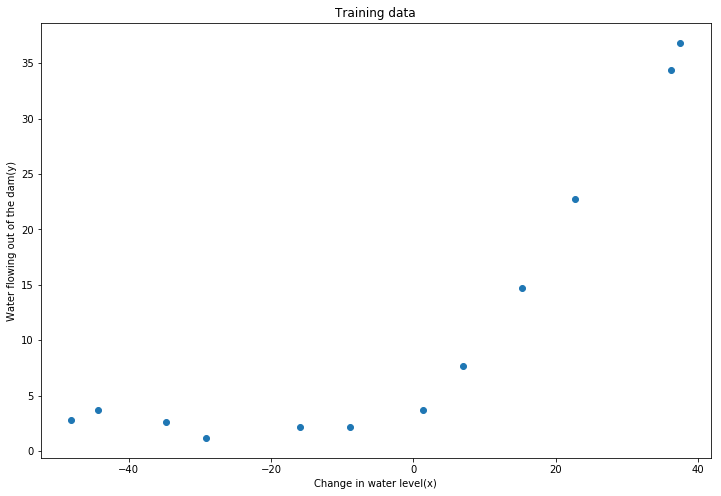

In [3]:
#Visualizing the dataset
#looks like a simple linear regression
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X'], data['y'])
ax.set(xlabel='Change in water level(x)', ylabel='Water flowing out of the dam(y)', title='Training data')


In [4]:
X=np.insert(data['X'], 0, np.ones(data['X'].shape[0]), axis=1)
y= data['y']

Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]
yval = data['yval']
theta = np.matrix(np.zeros((1,X.shape[1])))
learning_rate = 1
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [5]:
def cost(theta, X, y, learning_rate):
    theta = np.matrix(theta)
    num_of_training_data = X.shape[0] #notice len(X) = X.shape[0]
    X = np.matrix(X)  #np.insert(X, 0, np.ones(num_of_training_data, 1), axis=1)
    y = np.matrix(y)
    
    regulize=(learning_rate/(2*num_of_training_data)) * np.sum(np.power(theta[:, 1:],2))
    inner = np.power((X*theta.T)-y,2)
    term = np.sum(inner)
    
    return term + regulize
    

In [6]:
def gradient(theta, X, y, learning_rate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = X*theta.T - y
    grad = ((X.T * error)/X.shape[0]).T + (learning_rate/X.shape[0])*theta
    
    grad[0,0] = np.sum(np.multiply(error, X[:,0]))/ len(X)
    
    return np.array(grad).ravel()

In [7]:
gradient(theta, X, data['y'], 1)

array([ -11.21758933, -245.65199649])

In [28]:
from scipy.optimize import minimize

def train_linear_reg(X, y, learning_rate):
    #initial_theta = np.zeros((X.shape[1],1))
    initial_theta = np.array(np.ones((1,X.shape[1])))
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(cost, initial_theta, args=(X,y,learning_rate), method=None, jac=gradient,
                   options={'maxiter':5000})
    
    return(res)

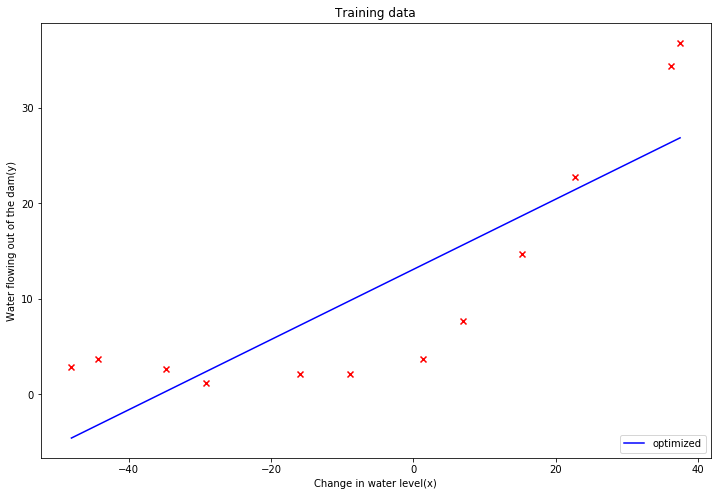

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

theta_min = train_linear_reg(X,y, learning_rate).x
x = np.linspace(X.min(), X.max(), 100)
fitted_line = theta_min[0] +(theta_min[1] * x ) 

ax.scatter(data['X'], data['y'], c='red', marker='x')
ax.set(xlabel='Change in water level(x)', ylabel='Water flowing out of the dam(y)', title='Training data')
ax.plot(x, fitted_line, c='blue', label='optimized')
ax.legend(loc=4)

In [10]:
def learning_curve(X,y, Xval, yval, learning_rate):
    m = y.size
    
    error_train = np.zeros((m,1 ))
    error_val = np.zeros((m,1))
    
    for i in np.arange(m):
        res = train_linear_reg(X[:i+1], y[:i+1], learning_rate)
        error_train[i] = cost(res.x, X[:i+1], y[:i+1], learning_rate)
        error_val[i] = cost(res.x, Xval, yval, learning_rate)
   
    return error_train, error_val

In [11]:
t_error, v_error = learning_curve(X,y, Xval, yval, learning_rate)

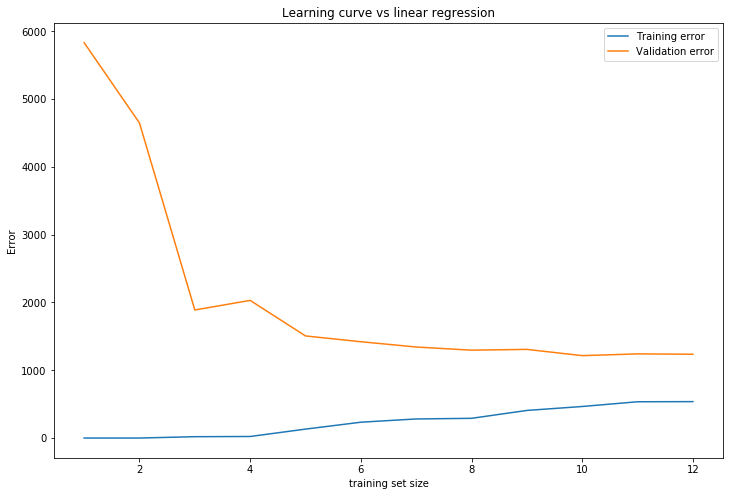

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,13), t_error, label='Training error')
ax.plot(np.arange(1,13), v_error, label='Validation error')
ax.set(xlabel='training set size', ylabel='Error', title='Learning curve vs linear regression')
ax.legend()

In [13]:
def poly_X(X, max_degree):
    X = np.matrix(X)
    X = np.c_[np.ones((X.shape[0],1)), X, np.zeros((X.shape[0], max_degree-1 ))]
    for i in range(0, max_degree+1):
        X[:,i] = np.power(X[:,1],i)
        
    return X

In [14]:
X = data['X']
np.set_printoptions(precision=6)
X = poly_X(X,8)


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[  0.000000e+00,  -3.782437e-01,  -7.886623e-01,   1.903287e-01,
         -7.375913e-01,   3.202520e-01,  -6.171516e-01,   3.598350e-01,
         -5.310913e-01],
       [  0.000000e+00,  -8.389201e-01,   1.314202e-03,  -2.589617e-01,
         -3.415648e-01,   9.754927e-02,  -4.551966e-01,   2.667734e-01,
         -4.688738e-01],
       [  0.000000e+00,   1.438717e+00,   6.108316e-01,   1.305341e+00,
          2.562200e-01,   1.021863e+00,  -1.269621e-02,   7.902100e-01,
         -1.779270e-01],
       [  0.000000e+00,   1.484123e+00,   7.380685e-01,   1.420312e+00,
          4.131218e-01,   1.155348e+00,   1.312237e-01,   9.107002e-01,
         -6.228954e-02],
       [  0.000000e+00,  -1.497919e+00,   1.936440e+00,  -2.127747e+00,
          2.435101e+00,  -2.518767e+00,   2.717922e+00,  -2.763317e+00,
          2.889082e+00],
       [  0.000000e+00,  -1.344093e-01,  -1.019366e+00,   2.625631e-01,
         -7.725777e-01,   3.310465e-01,  -6.214537e-01,   3.611887e-01,
         -5

[ 1.        8.475703  5.0027    3.297157  2.168203  1.599746  1.010179
  1.090175  0.370107]


"x = np.linspace(X.min(), X.max(), 1000)\ny = theta_min_poly[0]+ np.sum(theta_min_poly)\n\nax.scatter(data['X'], data['y'], c='red', marker='x')\nax.set(xlabel='Change in water level(x)', ylabel='Water flowing out of the dam(y)', title='Training data (Polynomial regression dgree 8)')\nax.plot(x, fitted_line, c='blue', label='optimized')\nax.legend(loc=4)"

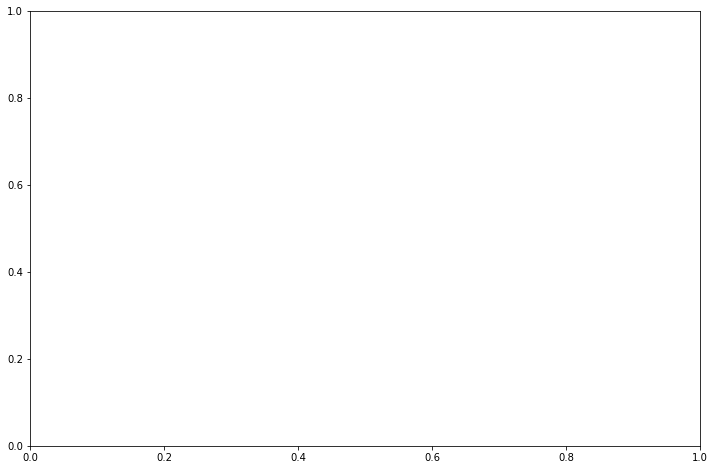

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

theta_min_poly = train_linear_reg(X, y, learning_rate).x
print(theta_min_poly)
'''x = np.linspace(X.min(), X.max(), 1000)
y = theta_min_poly[0]+ np.sum(theta_min_poly)

ax.scatter(data['X'], data['y'], c='red', marker='x')
ax.set(xlabel='Change in water level(x)', ylabel='Water flowing out of the dam(y)', title='Training data (Polynomial regression dgree 8)')
ax.plot(x, fitted_line, c='blue', label='optimized')
ax.legend(loc=4)'''

In [37]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
X= np.c_[np.ones_like(data['X']), data['X']]
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X[:,1].reshape(-1,1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
regr2.coef_, regr2.intercept_

(array([[  0.000000e+00,   3.182916e-01,   2.409670e-02,   6.270153e-04,
          -1.639918e-05,  -8.279720e-07,   1.836949e-09,   3.202153e-10,
           2.480263e-12]]), array([ 3.612836]))

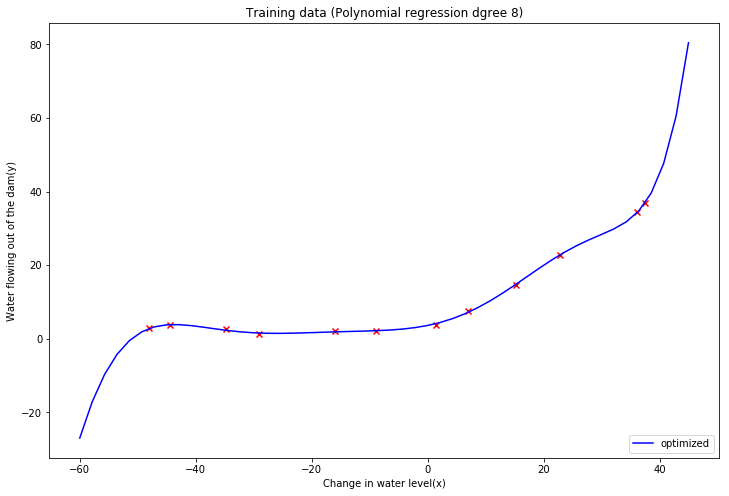

In [38]:
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X'], data['y'], c='red', marker='x')
ax.set(xlabel='Change in water level(x)', ylabel='Water flowing out of the dam(y)', title='Training data (Polynomial regression dgree 8)')
ax.plot(plot_x, plot_y, c='blue', label='optimized')
ax.legend(loc=4)